<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [10]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [6]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

#### Generate Descriptive Statistics and Visualizations


##### For the "Median value of owner-occupied homes" provide a boxplot

In [7]:
boston_df['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [8]:
boston_df['MEDV'].median()

21.2

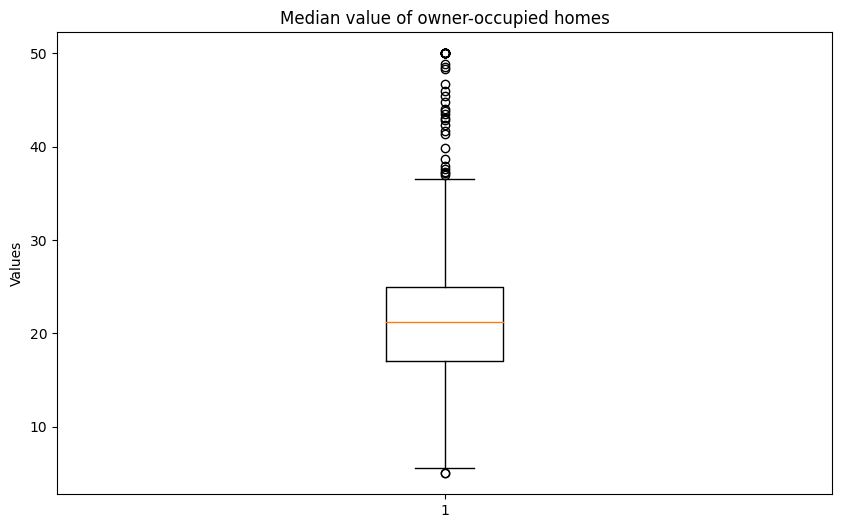

In [21]:
plt.figure(figsize=(10, 6))
plt.boxplot(boston_df['MEDV'])
plt.title('Median value of owner-occupied homes')
plt.ylabel('Values')
plt.show()

**Conclusion:** 
-  The median value of owner-occupied homes in the dataset is around 21,000, meaning half of the homes are valued above this amount and the other half below.

- The interquartile range, representing the middle 50% of the homes, lies between 17,025 (Q1) and 25,000 (Q3). This indicates that the central bulk of home values fall within this range.

- "Whiskers" extend from the minimum value of a little over 5,000 to almost 40,000, showing that most homes are valued within this range.

- Outliers, represented by values significantly higher than the typical range, extend to a maximum value of 50,000, indicating there are homes with notably higher values in the dataset.


##### Provide a  bar plot for the Charles river variable

In [12]:
boston_df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

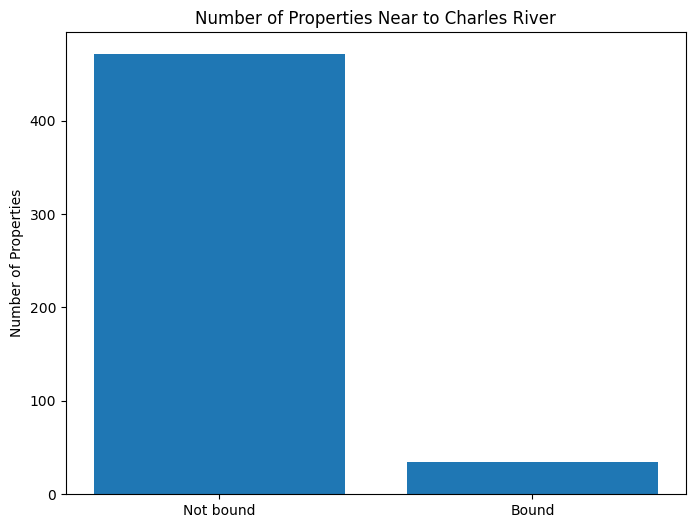

In [13]:
chas_counts = boston_df['CHAS'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(chas_counts.index, chas_counts.values, tick_label=['Not bound', 'Bound'])
plt.title('Number of Properties Near to Charles River')
plt.ylabel('Number of Properties')
plt.show()

**Conclusion:** The chart suggests that there are many more properties in the dataset that are not located on the Charles River. River-bound properties are less common.

##### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [15]:
boston_df['age_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], 
                         labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

In [16]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,between 35 and 70 years
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 years and older
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 years and older
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 years and older


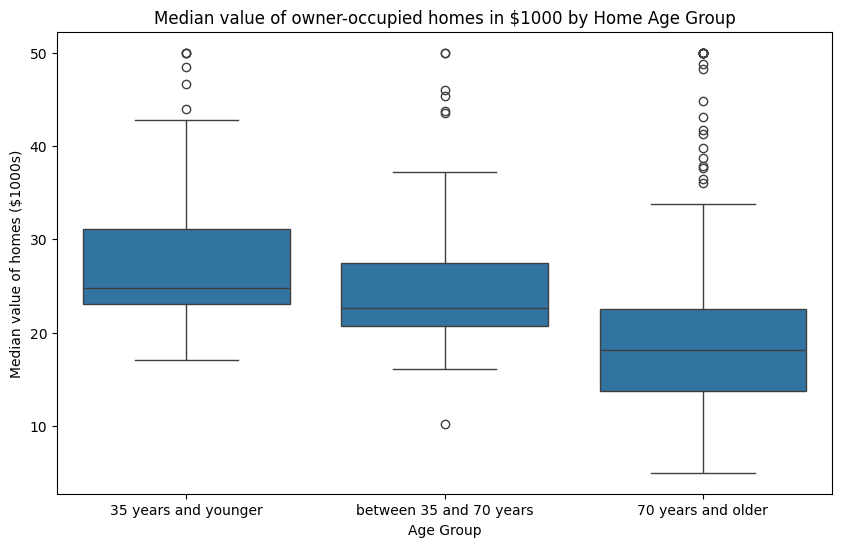

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='MEDV', data=boston_df)
plt.title('Median value of owner-occupied homes in $1000 by Home Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median value of homes ($1000s)')
plt.show()

**Conclusion:**
The boxplot indicates that the median value of owner-occupied homes decreases with the age of the property. Homes that are 35 years old or younger tend to have higher median values. Homes aged between 35 and 70 years have a slightly lower median value. Finally, homes that are 70 years old or older have the lowest median value but also show a wide range of values, with many outliers indicating that there are some very high-value homes in this age category despite the lower median. This suggests a greater variation in the value of older homes, which could be due to factors such as historical significance, location, or differing states of repair and modernization.

##### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

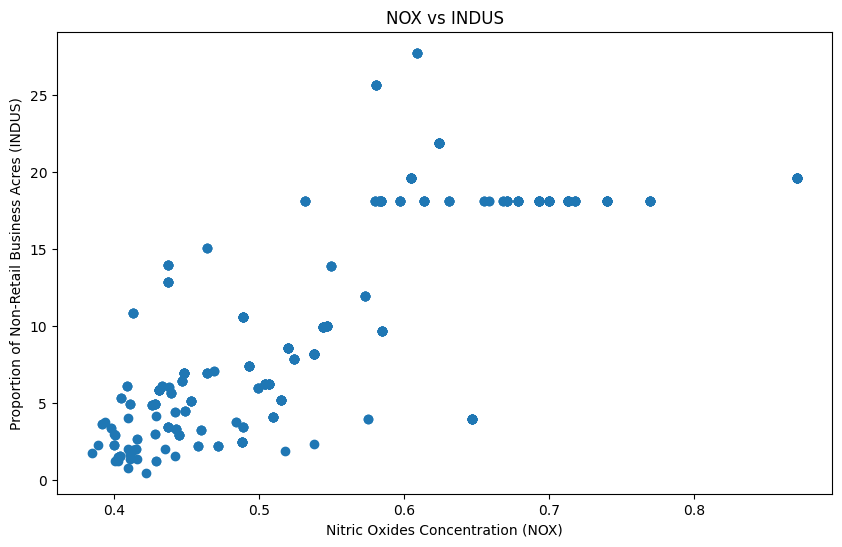

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(boston_df['NOX'], boston_df['INDUS'])
plt.title('NOX vs INDUS')
plt.xlabel('Nitric Oxides Concentration (NOX)')
plt.ylabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.show()

**Conclusion:**
The scatter plot suggests that towns with lower levels of nitric oxide concentration tend to have a smaller proportion of land with non-retail businesses. We can see positive correlation with general trend that as the nitric oxide concentration increases, the proportion of non-retail business acres per town also tends to increase.
Some outliers appear what indicates that there are some regions with a high proportion of non-retail business acres and low NOX concetration and as well as towns with high NOX concentrations but a lower proportion of non-retail business acres.

##### Create a histogram for the pupil to teacher ratio variable

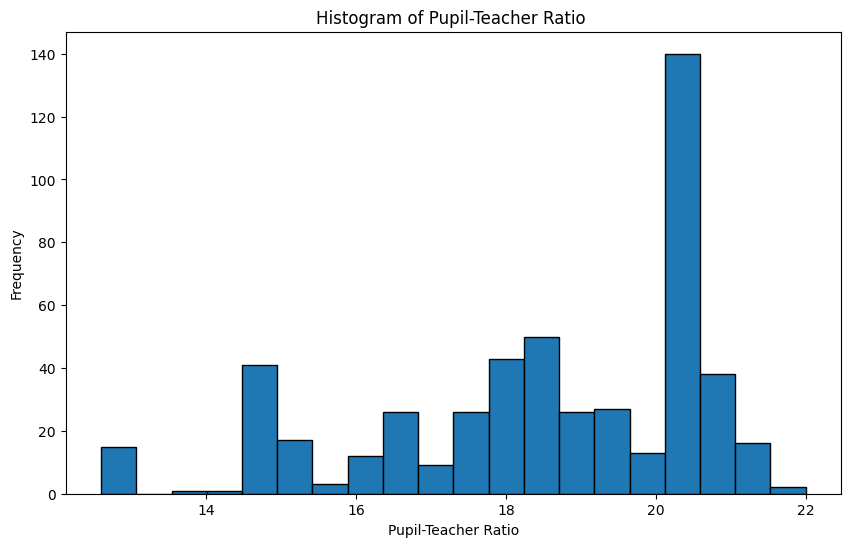

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(boston_df['PTRATIO'], bins=20, edgecolor='black')
plt.title('Histogram of Pupil-Teacher Ratio ')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

**Conclusion:** The histogram suggests that in the majority of schools or districts, there are about 20 pupils for every teacher. This high frequency at the 20 pupil-teacher ratio could indicate a standard or a common target ratio for schools within the dataset. The presence of fewer schools with significantly lower or higher ratios implies that deviations from this standard are less common. 

#### Use the appropriate tests to answer the questions provided.

##### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

**Hypothesis:** 
- Null hypothesis (H0): There is no difference in the median value of houses bounded by the Charles River and those that are not.
- Alternative hypothesis (H1): There is a difference in the median value of houses bounded by the Charles River and those that are not.

In [23]:
#Test for equality of variance
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [24]:
# since the p-value is less than 0.05, the variance are not equal
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

**Conclusion:** The p-value of 0.0036 is less than the alpha level of 0.05, that means H0 is rejected. There is a difference in the median value of houses bounded by the Charles River and those that are not bounded by Charles River.

##### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

**Hypothesis:** 
- Null hypothesis (H0): There is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 among the three age groups (35 years and younger, between 35 and 70 years, and 70 years and older).
- Alternative hypothesis (H1): There is at least one group that has a different median value of houses (MEDV) compared to the others. 

In [26]:
#Test for equality of variance
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [27]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'] 
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [28]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** The p-value is less than the alpha level of 0.05, that means we reject the null hypothesis (H0). The low p-value indicates that there is a statistically significant difference in the Median values of houses (MEDV) for at least one group of proportion of owner occupied units built prior to 1940

##### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)


**Hypothesis:** 
- Null hypothesis (H0): Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town
- Alternative hypothesis (H1): Nitric oxide concentrations is correlated with proportion of non-retail business acres per town

In [30]:
scipy.stats.pearsonr(boston_df["NOX"], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**Conclusion:**  The p-value is less than the alpha level of 0.05, that means we reject the null hypothesis (H0). There is a statistically significant strong positive relationship between nitric oxide concentrations and the proportion of non-retail business acres per town. This suggests that areas with higher proportions of non-retail business land tend to have higher concentrations of nitric oxide in the air.

##### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

**Hypothesis:** 
- Null hypothesis (H0): there is no impact of the additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes.
- Alternative hypothesis (H1): there is impact of the additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes.

In [31]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           1.21e-08
Time:                        21:48:24   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** The p-value is less than the alpha level of 0.05, that means we reject the null hypothesis (H0). There is a statistically significant impact, with the data suggesting that as the distance to employment centres increases, the median value of homes also increases.